<a href="https://colab.research.google.com/github/TaoFeng1234/Tao_Portfolio/blob/master/LassoEstimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# The following code is used only to generate training and test data.
# Provided by Professor Willett. and her team at the Unviersity of Chicago
import numpy as np
np. random . seed (0)
N_fold = 10
N_test = 500
N_train = 1000
N = N_test + N_train
# Specify feature dimensions of X and Y
X_dim = 20
Y_dim = 10
X = np. random . randn (N, X_dim )
# Only have 10 non - zero entries in beta ,
nnz = 10
beta = np. zeros (( X_dim * Y_dim ))
nnz_idx = np. random . choice ( X_dim * Y_dim , nnz , replace = False )
beta [ nnz_idx ] = np. random . randn (nnz ) * 2
beta = beta . reshape (X_dim , Y_dim )
Y = X @ beta + np. random . rand (N, Y_dim )
# Split training and testing set
X_test = X[: N_test ]
Y_test = Y[: N_test ]
X_train = X[ N_test :]
Y_train = Y[ N_test :]

The Lasso object is to minimize RSS($\beta$) + $\lambda\sum_{i}\beta_{i}$. 

I first fit the LR on the training data and calculate the MSE on the training set. $\lambda$ is choosen from 0 to 0.04 with a step of 0.001. Plot shows different lambda with the corrsesponding training MSE.



In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,make_scorer

In [5]:
import warnings; warnings.simplefilter('ignore')
train_MSE = []
test_MSE = []
lamdba = np.linspace(0,0.04,41)
for i in lamdba:
    reg = Lasso(alpha = i)
    clf = reg.fit(X_train, Y_train)
    train_yhat = clf.predict(X_train)
    test_yhat = clf.predict(X_test)
    mse_train = mean_squared_error(Y_train,train_yhat)
    mse_test= mean_squared_error(Y_test,test_yhat)
    train_MSE.append(mse_train)
    test_MSE.append(mse_test)

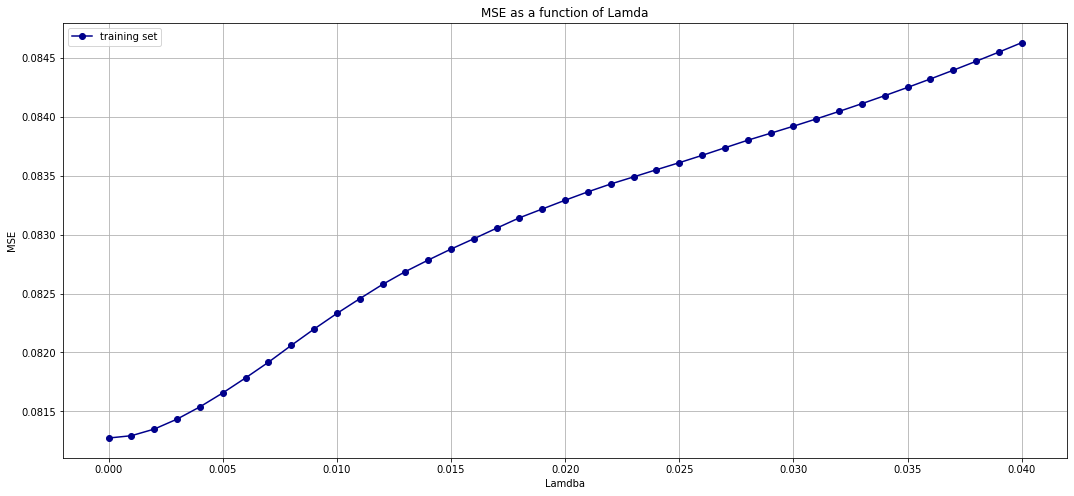

In [7]:
plt.figure(figsize=(18, 8))
plt.plot(lamdba,train_MSE,'bo-',label = 'training set',color="darkblue")
plt.title('MSE as a function of Lamda')
plt.xlabel('Lamdba')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

Implement 10-fold cross validation on the training set to select $\lambda$. Plot and compare the
MSE on the hold-out set with the true MSE which is computed on the test set. From the plot below we can see the best $\lambda$ value could be achieved around 13.

In [17]:

para_grid = {'alpha':np.arange(0,0.04,0.001)}

def msescore(y,yp):
  return mean_squared_error(y,yp)

score = make_scorer(msescore)
cv = GridSearchCV(Lasso(),param_grid=para_grid,cv=10,scoring=score)
cvtrain = cv.fit(X_train,Y_train)
MSEtrain = cvtrain.cv_results_['mean_test_score']
MSEtest = []
for i in lamdba:
  z = Lasso(alpha=i)
  p = z.fit(X_train,Y_train)
  MSEtest.append(mean_squared_error(p.predict(X_test),Y_test))

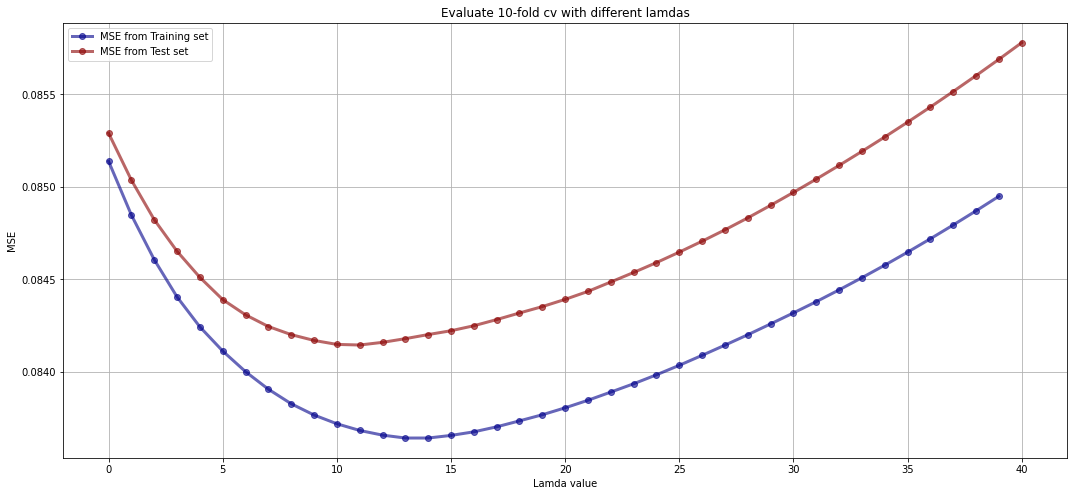

In [23]:
plt.figure(figsize=(18, 8))
plt.plot(MSEtrain, 'bo-', label='MSE from Training set', color="darkblue",alpha=0.6, linewidth=3)
plt.plot(MSEtest, 'bo-', label='MSE from Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel('MSE')
plt.title(r'Evaluate 10-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()